In [1]:
import os
import numpy as np

from tqdm.notebook import tqdm
from sklearn.metrics import auc

from tensorflow.keras.datasets.mnist import load_data

import matplotlib.pyplot as plt

In [2]:
(_, _), (_, y_test) = load_data(path=os.path.expanduser('~/dev/data/mnist/mnist.npz'))

In [3]:
y_pred = np.load('./tmp/mnist_test_pred.npy')

In [4]:
lsa = np.load('./tmp/lsa.npy')
dsa = np.load('./tmp/dsa.npy')

In [5]:
ae = np.load('./tmp/ae.npy')
vae = np.load('./tmp/vae.npy')

In [6]:
sim = np.load('./tmp/sim.npy')

In [7]:
cum_errors = []
auc_scores = []

for prioritization in [lsa, dsa, ae, vae, sim]:
    
    y_test_sorted = y_test[prioritization]
    y_pred_sorted = y_pred[prioritization]
    
    errors = 0
    cum_errors_ = []

    for i in range(len(y_test_sorted)):
        if y_test_sorted[i] != y_pred_sorted[i]:
            errors += 1
        cum_errors_.append(errors)
        
    auc_score = auc(range(len(y_test_sorted)), cum_errors_)
    
    cum_errors.append(cum_errors_)
    auc_scores.append(auc_score)

In [8]:
ideal = list(range(errors)) + [errors] * (len(cum_errors_)-errors)
random = [[0,len(cum_errors_)], [0,errors]]

In [9]:
auc_ideal = auc(range(len(y_test_sorted)), ideal)

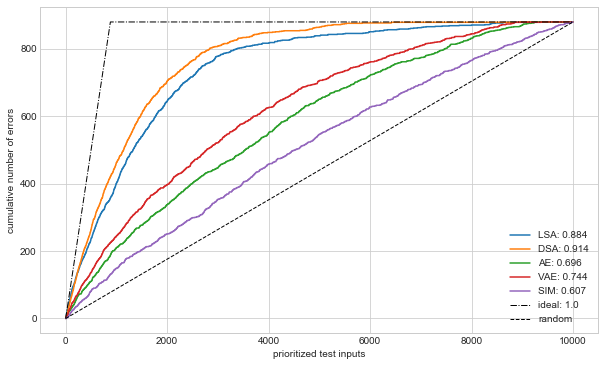

In [10]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,6))
    plt.plot(cum_errors[0], label='LSA: '+str(round(auc_scores[0]/auc_ideal,3)))
    plt.plot(cum_errors[1], label='DSA: '+str(round(auc_scores[1]/auc_ideal,3)))
    plt.plot(cum_errors[2], label='AE: '+str(round(auc_scores[2]/auc_ideal,3)))
    plt.plot(cum_errors[3], label='VAE: '+str(round(auc_scores[3]/auc_ideal,3)))
    plt.plot(cum_errors[4], label='SIM: '+str(round(auc_scores[4]/auc_ideal,3)))
    plt.plot(ideal, '-.', c='k', linewidth=1, label='ideal: '+str(auc_ideal/auc_ideal))
    plt.plot(*random, '--', c='k', linewidth=1, label='random')
    plt.xlabel('prioritized test inputs')
    plt.ylabel('cumulative number of errors')
    plt.legend()
    plt.show()